## Investigating song AUDIO data...

In [26]:
# library imports
import os
import pandas as pd
from os import listdir
from os.path import isfile, join

# local class imports
from spotify import spotifyApi

# data imports
data_path = "/Users/dayoorigunwa/code_base/music_mapping/data/"
allfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
audio_dfs = [filename for filename in allfiles if "12178525311" in filename]
audio_dfs.sort()
song_df = pd.read_csv(data_path + audio_dfs[-1])

data_path = "/Users/dayoorigunwa/code_base/music_mapping/data/"
allfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
audio_files = [f for f in allfiles if ("12178525311" in f) and (".csv" in f)]

# sanity check
audio_df = pd.DataFrame()
for filename in audio_files:
    tmp_df = pd.read_csv(data_path + filename)
    audio_df = pd.concat([audio_df, tmp_df], axis=0)
audio_df.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,0.844,0.0297,125.012,0.1140,0.0467,0.001410,4,0.780,9,438747,-5.374,0.926,0,audio_features,spotify:track:3pVzYSEtNN0yVyCdh525sW
1,0.700,0.6230,133.450,0.0323,0.6800,0.000277,4,0.596,5,265080,-4.911,0.926,0,audio_features,spotify:track:2s3TL6sMAZwaJsUfVAXbFU
2,0.616,0.0643,105.533,0.0363,0.2580,0.000051,4,0.669,11,282840,-13.451,0.873,0,audio_features,spotify:track:0bbh5GFICozcJn3ihCsuf3
3,0.926,0.2650,99.994,0.0956,0.0126,0.000111,4,0.836,6,234147,-6.401,0.974,1,audio_features,spotify:track:6mJrFb853Lhyba6N1RXB7K
4,0.530,0.0761,127.086,0.1650,0.0526,0.000000,4,0.915,7,123629,-8.578,0.750,1,audio_features,spotify:track:5P5NG0o1kmDds93Gwhlraq


#### NOTES: 
* Need to add songnames to this Dataframe; use the trackID in the uri column to GET songname
* most of the songs seem to be unique with a few duplicates... investigation below... 

In [27]:
# adding songnames into audio_df...
audio_df["song_uri"] = audio_df["uri"].apply(lambda x: x.split(":")[2])

In [28]:
audio_df.sort_values(by="uri", ascending=True, inplace=True)
tmp = audio_df["uri"].value_counts().to_frame()
dupes = tmp[tmp["uri"] > 1]
dupes_df = pd.DataFrame()
dupe_uris = list(dupes.index)
for uri in dupe_uris:
    sub_df = audio_df[audio_df["uri"] == uri]
    dupes_df = pd.concat([dupes_df, sub_df], axis=0)

print(f"Duplicated Songs: \n{dupes_df.size}")

Duplicated Songs: 
160


##### From the analysis above it seems that the spectral analysis is consistent so will delete dupes from Master audio_df moving forward...

In [29]:
audio_df = audio_df.drop_duplicates("uri")
audio_df.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,8.900000e+02,890.000000,890.000000,890.000000
mean,0.624520,0.197495,120.990683,0.134168,0.201274,0.099617,3.939326,0.663649,5.260674,2.300022e+05,-7.407084,0.409959,0.566292
std,0.183389,0.145679,26.820890,0.124246,0.251119,0.255569,0.356087,0.163794,3.629885,7.404461e+04,4.404628,0.231951,0.495865
min,0.002580,0.028700,62.225000,0.024200,0.000014,0.000000,1.000000,0.072800,0.000000,1.550000e+04,-37.890000,0.028900,0.000000
25%,0.526250,0.102000,100.062250,0.044925,0.024925,0.000000,4.000000,0.578000,1.000000,1.897835e+05,-8.384000,0.228000,0.000000
50%,0.637000,0.136500,121.982000,0.076300,0.093450,0.000002,4.000000,0.691500,5.000000,2.218675e+05,-6.491000,0.391000,1.000000
75%,0.753750,0.259500,139.918500,0.199500,0.286500,0.001840,4.000000,0.782000,8.000000,2.633940e+05,-5.091500,0.575750,1.000000
max,0.968000,0.970000,207.982000,0.916000,0.996000,0.982000,5.000000,0.977000,11.000000,1.193285e+06,-0.363000,0.974000,1.000000


In [36]:
# savings intermediate results for now...
print("Saving cleaned song audio data... \n")
date_piece = datetime.today().strftime("%Y-%m-%d")
audio_df.to_csv(data_path + "SpotifySongAudio_" + date_piece + ".csv", index=False)
audio_df.head()

Saving cleaned song audio data... 



,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri,song_uri
7,0.606,0.1000,129.996,0.0410,0.0255,0.000000,4,0.546,0,278715,-4.158,0.413,1,audio_features,spotify:track:007lsEHi6fP9LoYB7czYUa,007lsEHi6fP9LoYB7czYUa
19,0.599,0.2430,112.017,0.1380,0.4020,0.000572,4,0.703,4,280640,-8.687,0.312,1,audio_features,spotify:track:00YeYHw6zhoy1y7EPTgIkj,00YeYHw6zhoy1y7EPTgIkj
49,0.578,0.4030,142.028,0.0417,0.0859,0.000001,4,0.733,0,222318,-5.245,0.447,0,audio_features,spotify:track:01Ch5LzVStxCFPKkT1xg6k,01Ch5LzVStxCFPKkT1xg6k
178,0.600,0.2740,127.933,0.1180,0.0391,0.000000,4,0.958,9,181153,-6.996,0.607,0,audio_features,spotify:track:01DOm09B2AbiTARAbXVI6g,01DOm09B2AbiTARAbXVI6g
12,0.897,0.0399,180.118,0.0726,0.2210,0.000000,4,0.529,1,178788,-4.713,0.885,0,audio_features,spotify:track:02gGfhPHk5NuN0mgbKpU4Y,02gGfhPHk5NuN0mgbKpU4Y


#### Testing heat map visualization 
* Correlating all 863 songs by their normalized spotify signatures...

In [31]:
audio_df.columns

Index(['energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'time_signature', 'danceability', 'key',
       'duration_ms', 'loudness', 'valence', 'mode', 'type', 'uri',
       'song_uri'],
      dtype='object')

Interpret: variables that are RED or BLUE are highly correlated, 
 these may be subject to consideration for dimension reduction
 T/RH/AH appear to be very correlated with each other and other variables


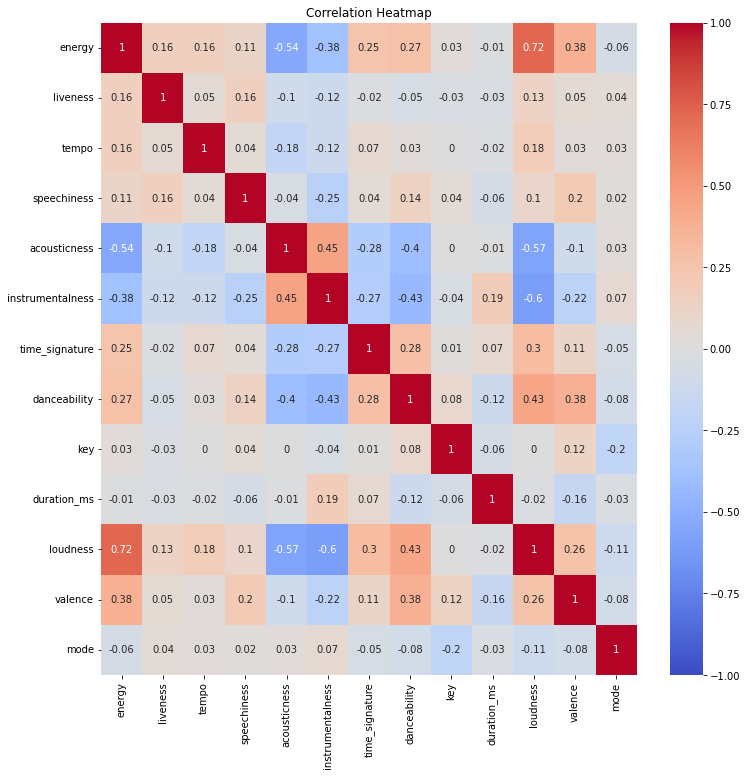

In [32]:
# Re. ~/Desktop/NEU/NEU MS Program Data Analytics/Spring 2021/IE 7275/Data-Mining-Tools/Homework2.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_data = audio_df.corr()

plt.figure(figsize=(12, 12))
sns.color_palette("coolwarm", as_cmap=True)
hm = sns.heatmap(round(corr_data, 2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
hm.set_title("Correlation Heatmap")

print(
    "Interpret: variables that are RED or BLUE are highly correlated, \n these may be subject to consideration for dimension reduction\n T/RH/AH appear to be very correlated with each other and other variables"
)

In [34]:
# Using old fashioned method for now...
corr_data = audio_df.drop(columns=["uri", "type"])
corr_df = corr_data.corr()
corr_df

# TODO: Figure out how to get a correlation measurement for each individual song; this is an analysis of each feature's correlation with each other
#       - ie. df.corrwith()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
energy,1.000000,0.162520,0.163315,0.105096,-0.535539,-0.377120,0.251387,0.266441,0.025953,-0.008865,0.723797,0.375819,-0.058712
liveness,0.162520,1.000000,0.048938,0.158161,-0.097754,-0.117113,-0.015148,-0.050041,-0.032471,-0.026254,0.130332,0.049681,0.038192
tempo,0.163315,0.048938,1.000000,0.035771,-0.176269,-0.122382,0.066181,0.030803,0.000169,-0.023777,0.177710,0.027619,0.025316
speechiness,0.105096,0.158161,0.035771,1.000000,-0.035024,-0.253611,0.037026,0.142271,0.043227,-0.057472,0.098117,0.197699,0.016608
acousticness,-0.535539,-0.097754,-0.176269,-0.035024,1.000000,0.449801,-0.279038,-0.400446,0.001188,-0.009493,-0.574648,-0.103893,0.031005
instrumentalness,-0.377120,-0.117113,-0.122382,-0.253611,0.449801,1.000000,-0.273033,-0.434658,-0.042917,0.189689,-0.595417,-0.223981,0.069833
time_signature,0.251387,-0.015148,0.066181,0.037026,-0.279038,-0.273033,1.000000,0.278728,0.010510,0.071542,0.297742,0.109623,-0.053642
danceability,0.266441,-0.050041,0.030803,0.142271,-0.400446,-0.434658,0.278728,1.000000,0.075366,-0.119008,0.426382,0.376983,-0.077577
key,0.025953,-0.032471,0.000169,0.043227,0.001188,-0.042917,0.010510,0.075366,1.000000,-0.060013,0.000650,0.117675,-0.195220
duration_ms,-0.008865,-0.026254,-0.023777,-0.057472,-0.009493,0.189689,0.071542,-0.119008,-0.060013,1.000000,-0.017526,-0.160601,-0.032598
